In [15]:
# Finding Correlating data variables using Python

# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sci

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts configuration of the plots being created

# Read in the data

df = pd.read_csv(r"C:\Users\Stitcher's_PC\Documents\Code\Projects\Python\MoviesProject\movies.csv")

#  Data Cleaning

In [2]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [3]:
# Remove missing data from considered data

df.dropna(subset=['budget', 'gross'], inplace = True)

# Convert data type of columns

df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')

In [4]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [5]:
# Some of the movies have a differing year and release reported in the data
# After looking into anomalous rows of data, this appears to occur to movies that have re-releases in different years

def get_year(date):
    if '(' in date:
        date = date[:date.index('(')]
    return date[-5:].strip()

df['original_release_year'] = df.released.apply(lambda date: get_year(str(date)))

In [6]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [7]:
# Here's a check for duplicate data
df[df.duplicated(subset=["name", "original_release_year", "gross", "runtime"])]

# The resulting output showcases no data that looks to be duplicated

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,original_release_year


# Data Analysis

In this section, I'll perform some basic statistical analysis on the data.

The purpose of this project is to practice, improve, and illustrate technical ability,
thus the measures taken to draw conclusions only show conclusions about this specific data set
and would be inadequate to show any statistically significant factors in society.
In order to generate statistically significant results, this project would require careful
use of control groups in A/B testing that lies outside of the scope of the project's purpose.

Moving forward, the intent of the data analysis is to find correlating factors between variables
of the data (ex: the influence of a movie's budget on its gross revenue).

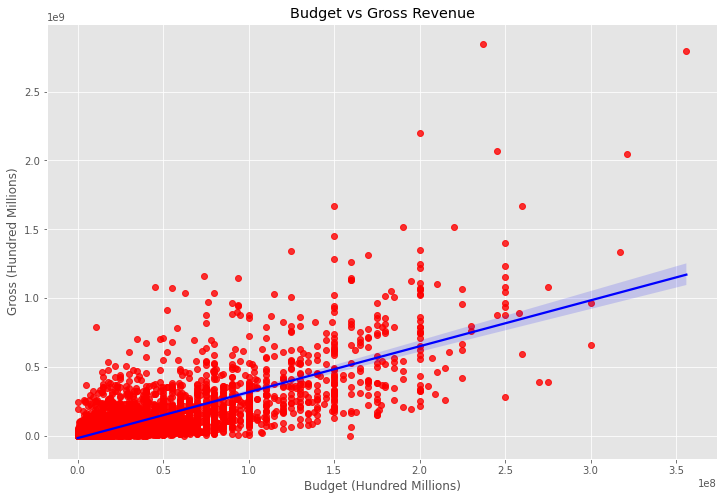

In [8]:
# Set up a scatter plot which plots a movie's budget against its gross revenue
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget (Hundred Millions)')
plt.ylabel('Gross (Hundred Millions)')
plt.show()

# Just from the looks of this graph, the data seems to be following a 'pattern'
# It would be beneficial to find the extent of this pattern by calculating correlation

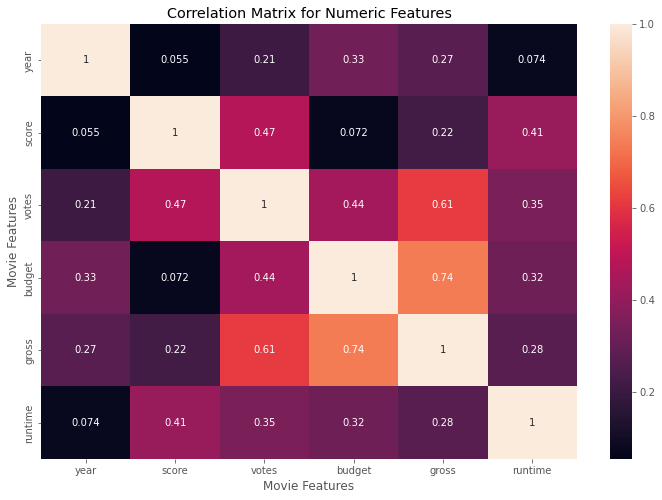

In [9]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# In this matrix, darker colors indicate variables that have low correlation,
# Lighter colors indicate variables with higher correlation,
# And 1 correlations are the same variable and are discounted

In [25]:
# Taking the data and putting into pairs
pd.set_option('display.max_rows', None)
corr_pairs = df.corr().unstack()
corr_pairs = corr_pairs.sort_values()

corr_pairs[(corr_pairs > 0.3) & (corr_pairs != 1)]

votes    runtime    0.309212
runtime  votes      0.309212
budget   runtime    0.320447
runtime  budget     0.320447
budget   year       0.329321
year     budget     0.329321
score    runtime    0.399451
runtime  score      0.399451
score    votes      0.409182
votes    score      0.409182
         budget     0.442429
budget   votes      0.442429
votes    gross      0.630757
gross    votes      0.630757
budget   gross      0.740395
gross    budget     0.740395
dtype: float64

In [37]:
# Finding the p-value related to correlation
# (r, p)

from scipy import stats
stats.pearsonr(df.dropna()['budget'], df.dropna()['gross'])

(0.740246543921963, 0.0)

In [47]:
corr_df = pd.DataFrame(columns=['r', 'p'])

for col in df:
    print(col)
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'budget':
        r, p = stats.pearsonr(df.dropna()['budget'], df.dropna()[col])
        corr_df.loc[col] = [round(r, 3), round(p, 10)]

corr_df

name
rating
genre
year
released
score
votes
director
writer
star
country
budget
gross
company
runtime


,r,p
year,0.328,0.000000e+00
score,0.072,1.115000e-07
votes,0.440,0.000000e+00
gross,0.740,0.000000e+00
runtime,0.319,0.000000e+00


#  Conclusion

The most significant conclusions reached from this data analysis is that the gross revenue of movies holds a strong positive  relationship with their budget and voting scores.

In addition many other variables listed above have weaker but not negliglible positive correlations, and due to the size of the sample data, all p-values are shown to be within significance (alpha < 0.05).